In [1]:
import requests, json

In [2]:
import requests 
import pandas as pd 
import datetime

In [3]:
api_key = "bd4debe75858698ff9a9c54d7f4d4eab"

In [6]:
lat = 18.184135
lon = 74.610764

In [7]:
api_url = f"http://api.openweathermap.org/data/2.5/forecast?lat={lat}&lon={lon}&appid={api_key}"

In [8]:
response = requests.get(api_url)
weather_data = response.json()
weather_data.keys()
len(weather_data['list'])
weather_data['list'][0]['weather'][0]['description']

'light rain'

In [9]:
temperatures = [item['main']['temp'] for item in weather_data['list']] 

In [10]:
timestamps = [pd.to_datetime(item['dt'], unit='s') for item in weather_data['list']]
temperature = [item['main']['temp'] for item in weather_data['list']]
humidity = [item['main']['humidity'] for item in weather_data['list']]      #retriving humidity data & putting it into list
wind_speed = [item['wind']['speed'] for item in weather_data['list']]
weather_description = [item['weather'][0]['description'] for item in weather_data['list']]

In [11]:
weather_df = pd.DataFrame({'Timestamp': timestamps, 
                           'Temperature': temperatures,                #creating dataframe
                           'humidity': humidity, 
                           'wind_speed':wind_speed,
                           'weather_description': weather_description})

In [12]:
weather_df.set_index('Timestamp', inplace=True)                   #set index
max_temp = weather_df['Temperature'].max()
print(f"Maximum Temperature - {max_temp}")
min_temp = weather_df['Temperature'].min()
print(f"Minimum Temperature - {min_temp}")

Maximum Temperature - 305.15
Minimum Temperature - 294.45


In [13]:
weather_df.fillna(0, inplace=True)           #replacing missing values

In [14]:
weather_df['Temperature'] = weather_df['Temperature'].apply(lambda x: x - 273.15 if isinstance(x, float)else x)

In [15]:
print(weather_df)

                     Temperature  humidity  wind_speed weather_description
Timestamp                                                                 
2024-09-09 12:00:00        30.62        51        7.93          light rain
2024-09-09 15:00:00        27.50        64        5.83     overcast clouds
2024-09-09 18:00:00        24.16        77        4.90     overcast clouds
2024-09-09 21:00:00        23.23        80        4.30     overcast clouds
2024-09-10 00:00:00        22.90        82        3.61     overcast clouds
2024-09-10 03:00:00        24.20        74        4.50     overcast clouds
2024-09-10 06:00:00        26.71        62        5.77     overcast clouds
2024-09-10 09:00:00        28.06        55        7.06     overcast clouds
2024-09-10 12:00:00        25.71        65        6.15     overcast clouds
2024-09-10 15:00:00        24.18        71        4.97     overcast clouds
2024-09-10 18:00:00        23.39        73        3.85     overcast clouds
2024-09-10 21:00:00      

In [16]:
import matplotlib.pyplot as plt
daily_mean_temp = weather_df['Temperature'].resample('D').mean()
daily_mean_humidity = weather_df['humidity'].resample('D').mean()
daily_mean_wind_speed = weather_df['wind_speed'].resample('D').mean()

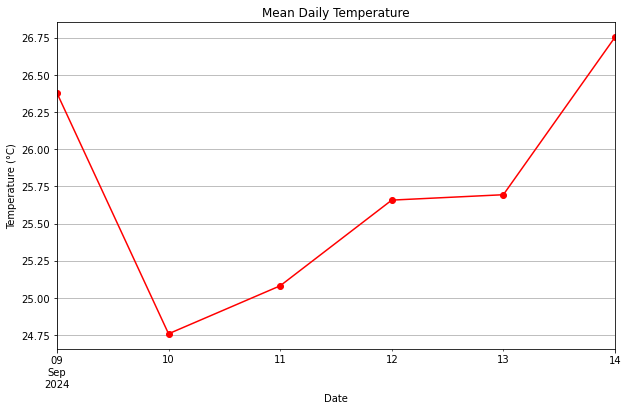

In [17]:
plt.figure(figsize=(10, 6))
daily_mean_temp.plot(color='red', linestyle='-', marker='o')                    #line plot
plt.title('Mean Daily Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()

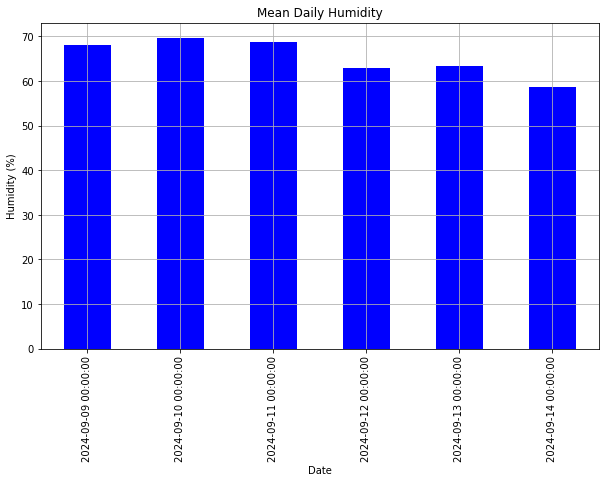

In [18]:
plt.figure(figsize=(10, 6))
daily_mean_humidity.plot(kind='bar', color='blue')
plt.title('Mean Daily Humidity')
plt.xlabel('Date')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.show()

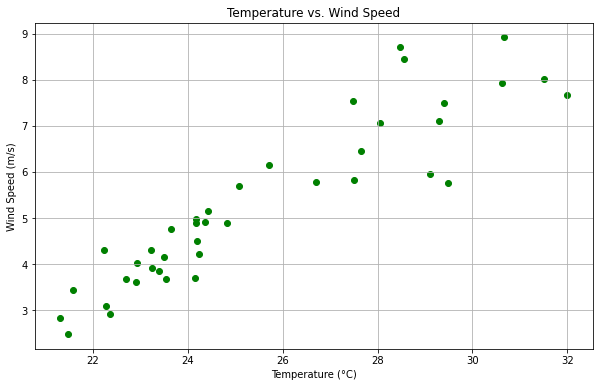

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(weather_df['Temperature'], weather_df['wind_speed'], color='green')
plt.title('Temperature vs. Wind Speed')
plt.xlabel('Temperature (°C)')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)
plt.show()

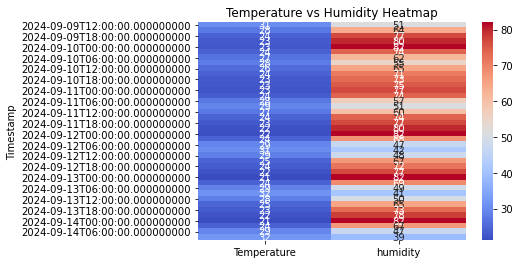

In [20]:
import seaborn as sns
heatmap_data = weather_df[['Temperature', 'humidity']]
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm')
plt.title('Temperature vs Humidity Heatmap')
plt.show()

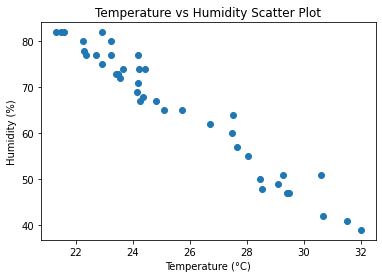

In [21]:
plt.scatter(weather_df['Temperature'], weather_df['humidity'])
plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity (%)')
plt.title('Temperature vs Humidity Scatter Plot')
plt.show()